<h2>Dengue Analysis</h2>
<hr>
<h3>Analyst: Mark Ernest V. Garay</h3>

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
from scipy.stats import f_oneway
warnings.filterwarnings('ignore')

In [2]:
dengue = pd.read_csv('dataset\\dengue.csv')

In [3]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [4]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [5]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

In [6]:
dengue.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

In [7]:
regional_death = dengue.groupby('Region')[['Dengue_Cases','Dengue_Deaths']].sum().reset_index()
regional_death

,Region,Dengue_Cases,Dengue_Deaths
0,BARMM,11537,332
1,CAR,30582,1008
2,NCR,115966,4008
3,Region I,59066,157
4,Region II,45141,193
5,Region III,131064,482
6,Region IV-A,163029,652
7,Region IV-B,30849,130
8,Region IX,47781,532
9,Region V,22167,185


In [8]:
regional_death['Mortality Rate'] = np.round((regional_death['Dengue_Deaths'] / regional_death['Dengue_Cases']) * 100, 2)
regional_death

,Region,Dengue_Cases,Dengue_Deaths,Mortality Rate
0,BARMM,11537,332,2.88
1,CAR,30582,1008,3.30
2,NCR,115966,4008,3.46
3,Region I,59066,157,0.27
4,Region II,45141,193,0.43
5,Region III,131064,482,0.37
6,Region IV-A,163029,652,0.40
7,Region IV-B,30849,130,0.42
8,Region IX,47781,532,1.11
9,Region V,22167,185,0.83


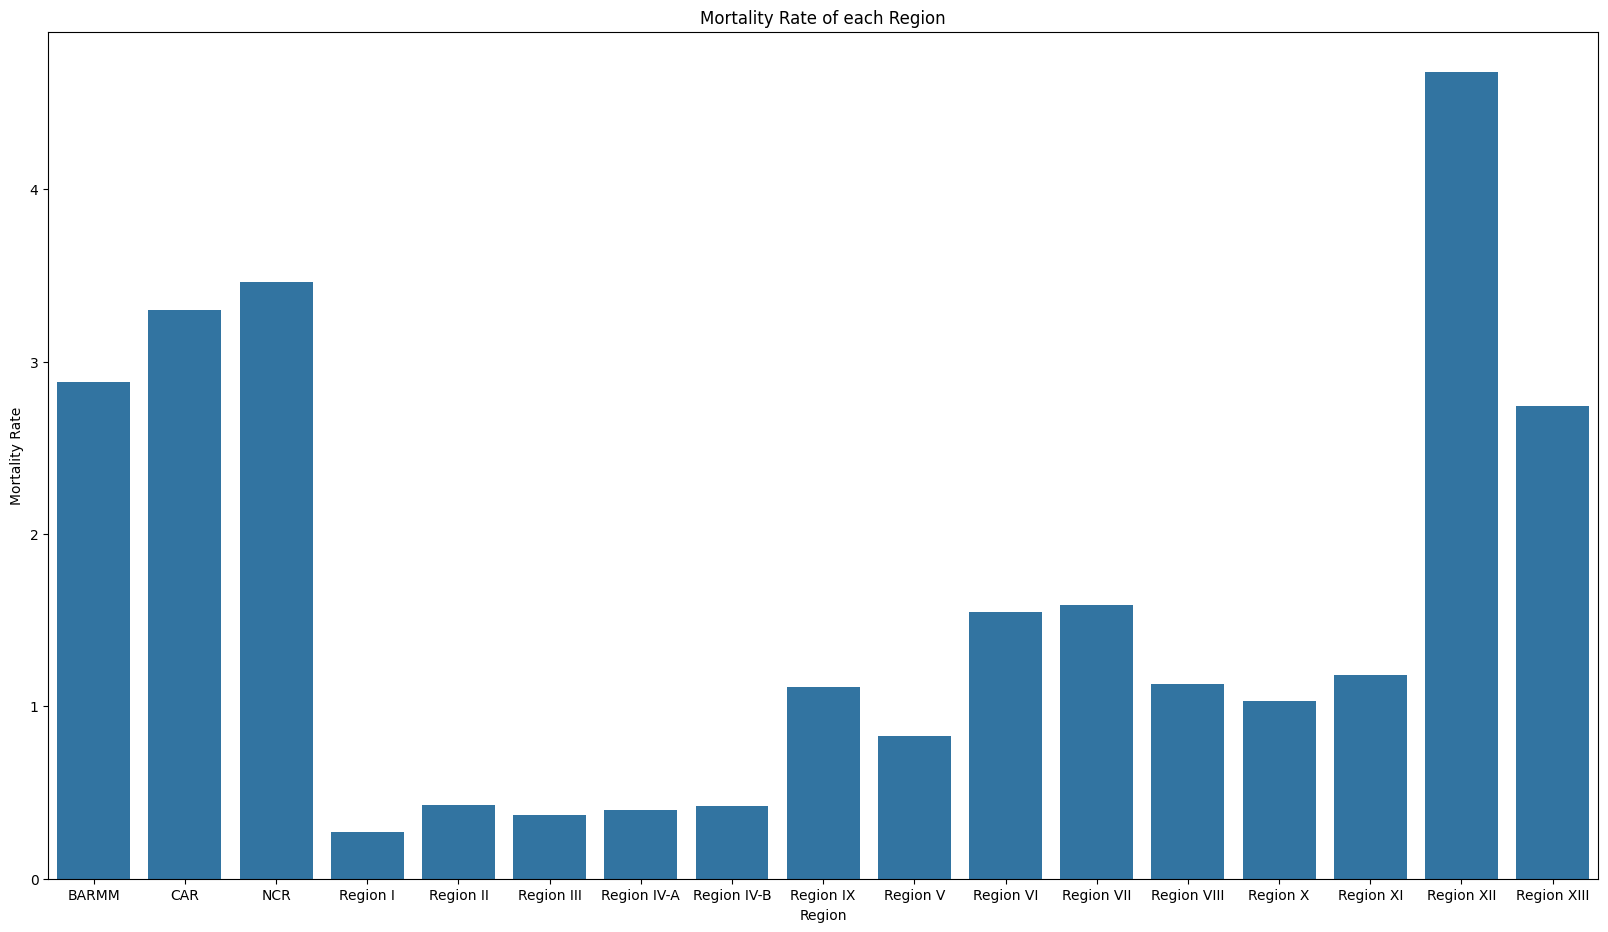

In [9]:
mortality_bar = sns.barplot(data=regional_death, x="Region",y="Mortality Rate")
plt.gcf().set_size_inches(20,11)
plt.title( 'Mortality Rate of each Region' )
plt.show()

<h3>Insight 1:</h3>
<h4>Region XII recorded the highest dengue mortality rate. This means more people in this region died from dengue compared to others. Possible reasons could include limited access to healthcare, late treatment, or fewer resources for disease control. It shows that Region XII might need stronger dengue prevention and response efforts.</h4>

<h3>Insight 2:</h3>
<h4>Regions I to IV-B had the lowest mortality rates. These areas reported fewer deaths from dengue, which suggest that people there get medical help faster, or that local health programs and prevention measures are working well. It could also mean residents are more aware of how to protect themselves from mosquito bites and manage symptoms early.</h4>
<hr>

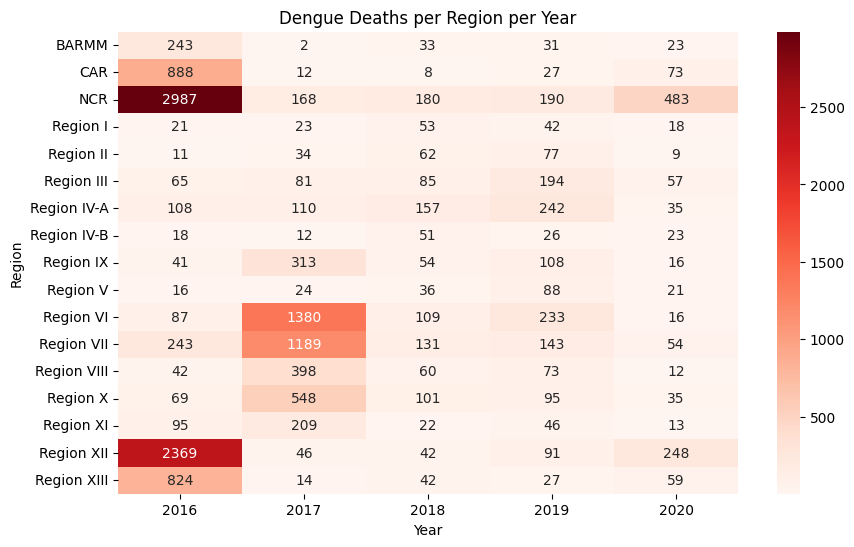

In [19]:
pivot_deaths = dengue.pivot_table(values='Dengue_Deaths', index='Region', columns='Year', aggfunc='sum')

plt.figure(figsize=(10,6))
sns.heatmap(pivot_deaths, cmap='Reds', annot=True, fmt='.0f')
plt.title('Dengue Deaths per Region per Year')
plt.show()

<h3>Insight 3:</h3>
<h4>NCR and Region XII had the most dengue deaths. In 2016, the National Capital Region (NCR) and Region XII recorded very high numbers of dengue deaths — NCR had almost 3,000 while Region XII had over 2,000. This shows that dengue was a serious problem in these areas that year, possibly because of crowded places and limited healthcare support.</h4>

<h3>Insight 4:</h3>
<h4>Dengue deaths went down after 2016. In the years after 2016, most regions showed fewer dengue deaths. This might be because of better health programs, more awareness about dengue prevention, and people becoming more careful about keeping their surroundings clean to avoid mosquito breeding.</h4>
<hr>

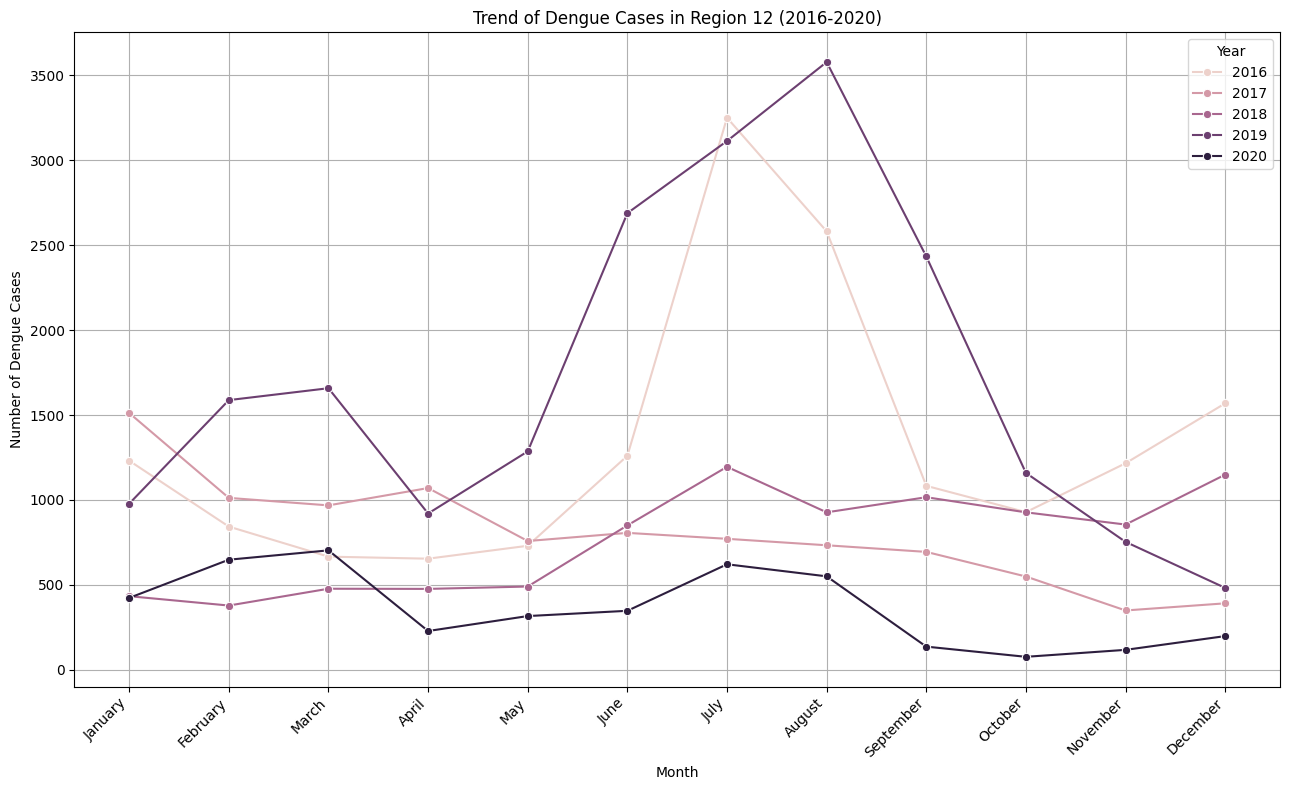

In [20]:
reg12 = dengue[dengue['Region'] == "Region XII"]

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)

sns.lineplot(data = reg12, x='Month', y='Dengue_Cases', hue='Year', marker='o')
plt.gcf().set_size_inches(13,8)
plt.title('Trend of Dengue Cases in Region 12 (2016-2020)')
plt.xlabel('Month')
plt.ylabel('Number of Dengue Cases')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

<h3>Insight 5:</h3>
<h4>2019 had the highest number of dengue cases. There was a big spike in 2019, especially around August, when cases reached over 3,500. This shows that 2019 experienced a serious dengue outbreak in Region 12 compared to the other years.</h4>

<h3>Insight 6:</h3>
<h4>Dengue cases usually rise during the middle of the year. The graph shows that from June to August, the number of dengue cases increases almost every year. This pattern could be related to the rainy season, when mosquitoes breed more easily.</h4>

<h3>Insight 7:</h3>
<h4>In 2020, dengue cases were much lower throughout the year. This may be due to COVID-19 restrictions, which reduced outdoor activities and improved cleanliness, helping to limit mosquito exposure and spread.</h4>
<hr>

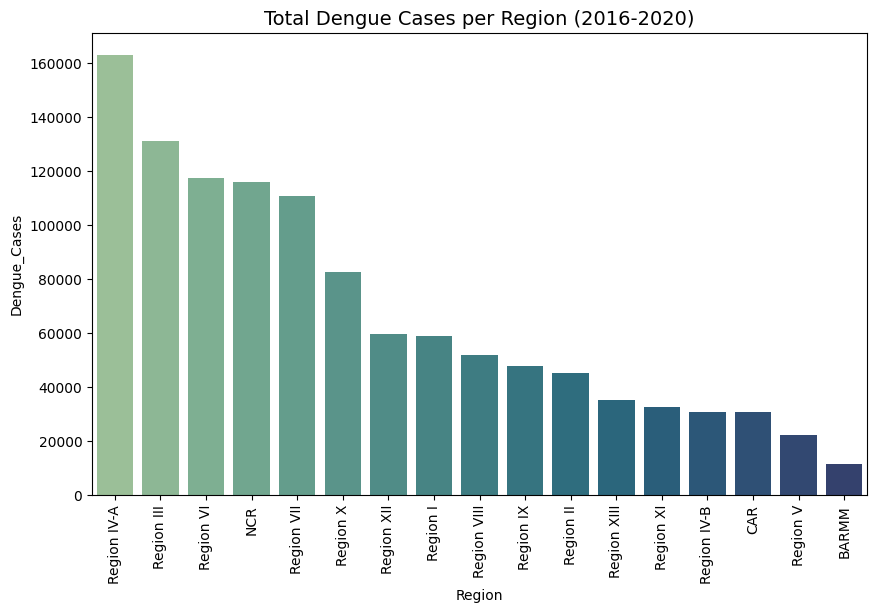

         Region  Dengue_Cases
6   Region IV-A        163029
5    Region III        131064
10    Region VI        117523
2           NCR        115966
11   Region VII        110683
13     Region X         82437
15   Region XII         59802
3      Region I         59066
12  Region VIII         51983
8     Region IX         47781
4     Region II         45141
16  Region XIII         35293
14    Region XI         32522
7   Region IV-B         30849
1           CAR         30582
9      Region V         22167
0         BARMM         11537


In [21]:
totalcase_per_region = dengue.groupby('Region')['Dengue_Cases'].sum().reset_index()
totalcase_per_region = totalcase_per_region.sort_values(by='Dengue_Cases', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=totalcase_per_region, 
            x='Region', 
            y='Dengue_Cases', 
            palette='crest')
plt.title('Total Dengue Cases per Region (2016-2020)', fontsize=14)
plt.xticks(rotation=90)
plt.show()

print(totalcase_per_region)

<h3>Insight 8:</h3>
<h4>Region IV-A had the highest number of dengue cases. From 2016 to 2020, Region IV-A recorded the most dengue cases, reaching over 160,000. This may be because it has a large population and many urban areas where mosquitoes can easily breed.</h4>

<h3>Insight 9:</h3>
<h4>BARMM had the lowest number of dengue cases. The Bangsamoro Autonomous Region in Muslim Mindanao (BARMM) had the fewest reported dengue cases. This could be due to lower population density or fewer reported cases because of limited surveillance and reporting systems.</h4>

<h3>Insight 10:</h3>
<h4>Most dengue cases came from highly populated regions. Regions like IV-A, III, NCR, and VI had some of the highest case numbers. This shows that dengue is more common in crowded and urbanized areas where mosquitoes thrive and spread faster.</h4>
<hr>